# Dataset

Opracowanie zbioru danych. Wizualizacja istotnych elementów oraz wprowadzenie algorytmów mających na celu nauczenie się procesu decyzji o udzieleniu kredytu na podstawie podanych informacji.

# Zaimportowanie potrzebnych elementów

Do analizy :

In [289]:
import pandas as pd
import numpy as np

Do wizualizacji :

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Do uczenia maszynowego :

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Dane

Plik źródłowy zawierający dane :

In [292]:
train_df = pd.read_csv('/home/adsyro/MISSP/train.csv')

Wyświetlenie przed wprowadzeniem zmian :

In [293]:
train_df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
1,1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
2,2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
3,3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
4,4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no
5,5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes
6,6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no
7,7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no
8,8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes
9,9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no


Zmiana nazw kolumn dla ułatwienia odbioru :

In [294]:
train_df.columns=['Number', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Account Balance', 'Housing', 
                     'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Days', 'Previous', 'Outcome', 'Deposit']
train_df

,Number,Age,Job,Marital,Education,Default,Account Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Days,Previous,Outcome,Deposit
0,0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
1,1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
2,2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
3,3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
4,4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no
5,5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes
6,6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no
7,7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no
8,8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes
9,9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no


Dodanie przedziałów w kolumnach, które posiadają dane praktycznie unikalne dla każdego wpisu :

In [295]:
train_df['Age'] = pd.cut(train_df['Age'], [17,30,40,50,60,np.inf] , labels=[0,1,2,3,4])
train_df['Account Balance'] = pd.cut(train_df['Account Balance'], [-np.inf,0, np.inf] , labels=[0,1])
train_df['Duration'] = pd.cut(train_df['Duration'], [0,500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, np.inf], labels=[0,1,2,3,4,5,6,7,8])

Bardziej istotny jest dla nas przedział wiekowy danej osoby niż jej dokładny wiek, podobnie czas trwania. W kwestii stanu konta najważniejszy jest fakt, czy kwota znajdująca się na nim jest powyżej czy poniżej zera.

In [296]:
train_df

,Number,Age,Job,Marital,Education,Default,Account Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Days,Previous,Outcome,Deposit
0,0,3,services,married,tertiary,no,1,yes,no,cellular,16,aug,0,3,761,1,other,yes
1,1,0,student,single,secondary,no,1,no,no,cellular,3,mar,0,1,180,2,failure,yes
2,2,1,services,married,secondary,no,1,yes,no,cellular,17,apr,0,1,344,1,failure,no
3,3,1,management,single,tertiary,no,1,no,no,cellular,29,jan,2,1,-1,0,unknown,yes
4,4,1,technician,married,secondary,no,1,yes,yes,cellular,20,apr,0,1,-1,0,unknown,no
5,5,1,management,married,tertiary,no,1,yes,no,cellular,12,aug,0,1,-1,0,unknown,yes
6,6,1,entrepreneur,married,tertiary,no,1,yes,no,unknown,6,jun,0,5,-1,0,unknown,no
7,7,3,services,single,secondary,no,1,yes,no,cellular,29,jul,0,2,-1,0,unknown,no
8,8,3,retired,married,primary,no,1,no,no,telephone,25,jul,3,4,-1,0,unknown,yes
9,9,1,management,single,tertiary,no,1,yes,no,unknown,29,may,0,4,-1,0,unknown,no


Wybranie kolumny 'Deposit' (pol. kaucja) jako danej prezentującej osoby, które dostały kredyt oraz zmiana jej wartości na liczbowe.

In [270]:
train_df.loc[train_df['Deposit']=='no', ['Deposit']]= 0
train_df.loc[train_df['Deposit']=='yes', ['Deposit']]= 1
train_df

,Number,Age,Job,Marital,Education,Default,Account Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Days,Previous,Outcome,Deposit
0,0,3,services,married,tertiary,no,1,yes,no,cellular,16,aug,0,3,761,1,other,1
1,1,0,student,single,secondary,no,1,no,no,cellular,3,mar,0,1,180,2,failure,1
2,2,1,services,married,secondary,no,1,yes,no,cellular,17,apr,0,1,344,1,failure,0
3,3,1,management,single,tertiary,no,1,no,no,cellular,29,jan,2,1,-1,0,unknown,1
4,4,1,technician,married,secondary,no,1,yes,yes,cellular,20,apr,0,1,-1,0,unknown,0
5,5,1,management,married,tertiary,no,1,yes,no,cellular,12,aug,0,1,-1,0,unknown,1
6,6,1,entrepreneur,married,tertiary,no,1,yes,no,unknown,6,jun,0,5,-1,0,unknown,0
7,7,3,services,single,secondary,no,1,yes,no,cellular,29,jul,0,2,-1,0,unknown,0
8,8,3,retired,married,primary,no,1,no,no,telephone,25,jul,3,4,-1,0,unknown,1
9,9,1,management,single,tertiary,no,1,yes,no,unknown,29,may,0,4,-1,0,unknown,0


# Wizualizacja

Po edycji wartości 'yes'/'no' na '1'/'0' możemy w sposób procentowy przedstawiać zależność otrzymania kredytu od innych danych.

Wykształcenia :

In [271]:
train_df[['Education', 'Deposit']].groupby(['Education'], as_index=False).mean().sort_values(by='Deposit', ascending=False)

,Education,Deposit
2,tertiary,0.546822
3,unknown,0.505435
1,secondary,0.447322
0,primary,0.389720


Stanu cywilnego :

In [272]:
train_df[['Marital', 'Deposit']].groupby(['Marital'], as_index=False).mean().sort_values(by='Deposit', ascending=False)

,Marital,Deposit
2,single,0.548872
0,divorced,0.485246
1,married,0.432738


Przedziału wiekowego :

In [273]:
train_df[['Age', 'Deposit']].groupby(['Age'], as_index=False).mean().sort_values(by='Deposit', ascending=False)

,Age,Deposit
4,4,0.819957
0,0,0.568197
1,1,0.439249
3,3,0.426923
2,2,0.406408


Stanu konta :

In [274]:
train_df[['Account Balance', 'Deposit']].groupby(['Account Balance'], as_index=False).mean().sort_values(by='Deposit', ascending=False)

,Account Balance,Deposit
1,1,0.494829
0,0,0.348231


Posiadanego kredytu mieszkaniowego :

In [275]:
train_df[['Housing', 'Deposit']].groupby(['Housing'], as_index=False).mean().sort_values(by='Deposit', ascending=False)

,Housing,Deposit
0,no,0.571902
1,yes,0.368283


Już posiadanej pożyczki :

In [276]:
train_df[['Loan', 'Deposit']].groupby(['Loan'], as_index=False).mean().sort_values(by='Deposit', ascending=False)

,Loan,Deposit
0,no,0.496356
1,yes,0.333013


# Wizualizacja w postaci wykresów

Rozkład decyzji pozytywnych oraz negatywnych w zależności od zajmowanego stanowiska :

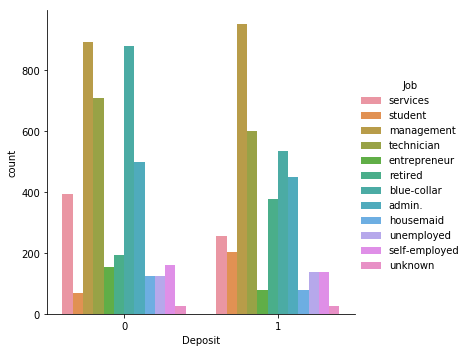

In [277]:
sns.catplot('Deposit', data=train_df, hue='Job', kind = 'count')

Rozkład decyzji pozytywnych oraz negatywnych w zależności od przedziału wiekowego :

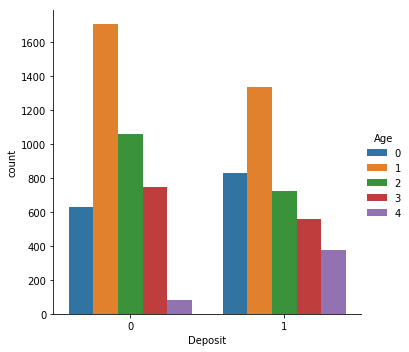

In [278]:
sns.catplot('Deposit', data=train_df, hue='Age', kind = 'count')

Przedstawienie rozkładu decyzji biorąc pod uwagę trzy zmienne - Kredyt mieszkaniowy, stan cywilny oraz posiadaną już pożyczkę :

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


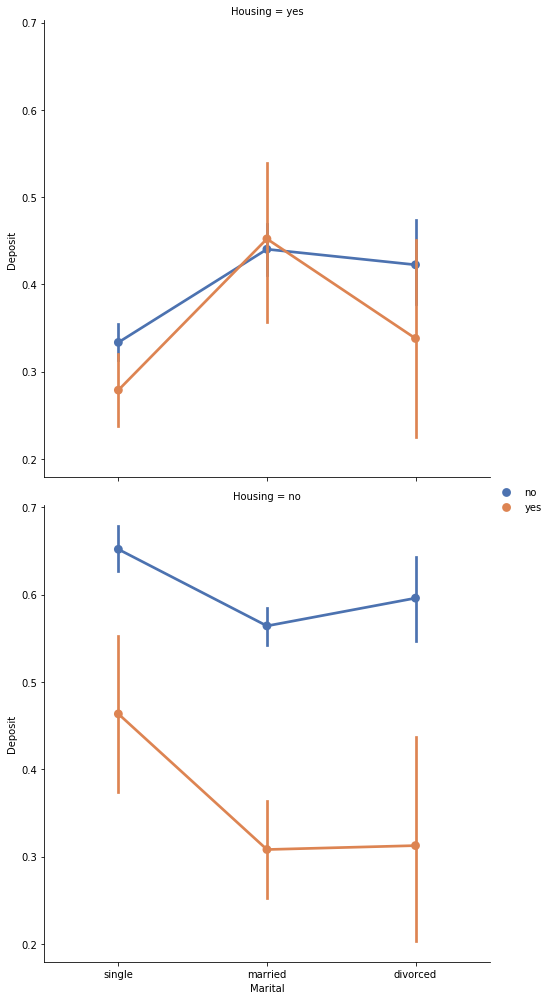

In [279]:
grid = sns.FacetGrid(train_df, row='Housing', size=7, aspect=1)
grid.map(sns.pointplot, 'Marital', 'Deposit', 'Loan', palette='deep')
grid.add_legend()

# Edycja danych do użycia w algorytmach uczących

By poprawnie i bezproblemowo używać naszych danych w algorytmach uczących musimy zapewnić, w naszej tabeli obecność tylko wartości liczbowych. Poniżej zawarte polecenia zmieniają dane wartości typu string na liczby przez nas zdefiniowane. By uchornić nasz algorytm w przypadku zmiany pliku wejściowego, do kategorii, której dane mogą wykraczać poza nasze założenia, zostało dopisane dodatkowe polecenie. Każda wartość niepasująca do żadnej z kategorii trafia do uniwersalnej kategorii "Other", unikalnej dla każdej grupy. Zakładamy, że nazwy kolumn w nowym pliku będą bliźniacze z tymi, które znajdują się w używanym przez nas źródle.

In [280]:
train_df.loc[train_df['Job']=='services', ['Job']]= 0
train_df.loc[train_df['Job']=='student', ['Job']]= 1
train_df.loc[train_df['Job']=='management', ['Job']]= 2
train_df.loc[train_df['Job']=='technician', ['Job']]= 3
train_df.loc[train_df['Job']=='entrepreneur', ['Job']]= 4
train_df.loc[train_df['Job']=='retired', ['Job']]= 5
train_df.loc[train_df['Job']=='blue-collar', ['Job']]= 6
train_df.loc[train_df['Job']=='admin.', ['Job']]= 7
train_df.loc[train_df['Job']=='housemaid', ['Job']]= 8
train_df.loc[train_df['Job']=='unemployed', ['Job']]= 9
train_df.loc[train_df['Job']=='self-employed', ['Job']]= 10
train_df.loc[train_df['Job']=='unknown', ['Job']]= 11
train_df.loc[(train_df['Job'] != 0) & (train_df['Job'] != 1) & (train_df['Job'] != 2) &
             (train_df['Job'] != 3) & (train_df['Job'] != 4) & (train_df['Job'] != 5) &
             (train_df['Job'] != 6) & (train_df['Job'] != 7) & (train_df['Job'] != 8) &
             (train_df['Job'] != 9) & (train_df['Job'] != 10) & (train_df['Job'] != 11)             
             , ['Job']]= 12

train_df.loc[train_df['Loan']=='no', ['Loan']]= 0
train_df.loc[train_df['Loan']=='yes', ['Loan']]= 1

train_df.loc[train_df['Housing']=='no', ['Housing']]= 0
train_df.loc[train_df['Housing']=='yes', ['Housing']]= 1

train_df.loc[train_df['Default']=='no', ['Default']]= 0
train_df.loc[train_df['Default']=='yes', ['Default']]= 1

train_df.loc[train_df['Education']=='primary', ['Education']]= 0
train_df.loc[train_df['Education']=='secondary', ['Education']]= 1
train_df.loc[train_df['Education']=='tertiary', ['Education']]= 2
train_df.loc[train_df['Education']=='unknown', ['Education']]= 4
train_df.loc[(train_df['Education'] != 0) & (train_df['Education'] != 1) & 
             (train_df['Education'] != 2) & (train_df['Education'] != 4)
             , ['Education']]= 3



train_df.loc[train_df['Contact']=='cellular', ['Contact']]= 0
train_df.loc[train_df['Contact']=='telephone', ['Contact']]= 1
train_df.loc[train_df['Contact']=='unknown', ['Contact']]= 3
train_df.loc[(train_df['Contact'] != 0) & (train_df['Contact'] != 1) & (train_df['Contact'] != 3), ['Marital']]= 2



train_df.loc[train_df['Marital']=='single', ['Marital']]= 0
train_df.loc[train_df['Marital']=='married', ['Marital']]= 1
train_df.loc[train_df['Marital']=='divorced', ['Marital']]= 2
train_df.loc[(train_df['Marital'] != 0) & (train_df['Marital'] != 1) & (train_df['Marital'] != 2), ['Marital']]= 3

train_df.loc[train_df['Outcome']=='success', ['Outcome']]= 0
train_df.loc[train_df['Outcome']=='failure', ['Outcome']]= 1
train_df.loc[train_df['Outcome']=='unknown', ['Outcome']]= 3
train_df.loc[(train_df['Outcome'] != 0) & (train_df['Outcome'] != 1) & (train_df['Outcome'] != 3), ['Outcome']]= 2



train_df.loc[train_df['Month']=='jan', ['Month']]= 0
train_df.loc[train_df['Month']=='feb', ['Month']]= 1
train_df.loc[train_df['Month']=='mar', ['Month']]= 2
train_df.loc[train_df['Month']=='apr', ['Month']]= 3
train_df.loc[train_df['Month']=='may', ['Month']]= 4
train_df.loc[train_df['Month']=='jun', ['Month']]= 5
train_df.loc[train_df['Month']=='jul', ['Month']]= 6
train_df.loc[train_df['Month']=='aug', ['Month']]= 7
train_df.loc[train_df['Month']=='sep', ['Month']]= 8
train_df.loc[train_df['Month']=='oct', ['Month']]= 9
train_df.loc[train_df['Month']=='nov', ['Month']]= 10
train_df.loc[train_df['Month']=='dec', ['Month']]= 11

Opisanie macierzy głównej naszego zbioru oraz określenie jej części 'x' i 'y' :

In [281]:
macierz = np.array(train_df)
x = macierz[:, :-1]
y = macierz[:,-1]

Podział naszego zbioru na część treningową oraz walidacyjną :

In [282]:
y_p = np.array(train_df[['Loan']])
x_p = np.array(train_df[['Marital', 'Education', 'Deposit',
                         'Age', 'Job', 'Contact', 'Housing',
                         'Outcome', 'Month', 'Days', 'Day', 
                         'Account Balance', 'Campaign',
                         'Default', 'Duration']])
x2, x_test, y2, y_test = train_test_split(x_p, y_p,
                                          test_size=0.20,
                                          random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x2, y2,
                                                     test_size=0.70,
                                                     random_state=7)


# Algorytm 'K-Nearest-Neighbors' (KNN)

Działanie na zbiorze treningowym :

In [283]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 14)
acc_knn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


90.041493775933617

Działanie na zbiorze walidacyjnym :

In [284]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_valid, y_valid)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_valid, y_valid) * 100, 14)
acc_knn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


89.844444444444449

# Algorytm 'Gaussian Naive Bayes'

Działanie na zbiorze treningowym :

In [285]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 15)
acc_gaussian

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


86.255186721991706

Działanie na zbiorze walidacyjnym :

In [286]:
gaussian = GaussianNB()
gaussian.fit(x_valid, y_valid)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_valid, y_valid) * 100, 15)
acc_gaussian

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


83.0